# Protein Structures Resolution

In structural biology study different protein properties are studied from their atomic structures. Understanding the proteins at atomic level is essential to understand the function of protein which is eventually used for different applications in protein engineering and drug discovery. X- ray crystallography is one of the most widely used and effective methods of determining protein structure, among other methods like NMR and Cryo-EM. 
In this notebook we will be doing Exploratory Data Analysis on the crystal dimensions, crystal properties, X-ray data collection details and X-ray method details which have been extracted from [RCSB Protein Data Bank](https://www.rcsb.org/) to predict the resolution variable.


### Data Set Link :  [PDB Dataset](https://bit.ly/3K0LUJq)
 This dataset has more than 300 features for each protein structure for different categories. As we will be focusing on the X-ray diffraction and protein structure properties data we have extracted 42 features from it.
 
In this project the Resolution value which is between (1 to 3) will be predicted. As a rule, structures with resolution values that are small, called "high-resolution structures". These Resolutions will be converted into boolean values and then logistic regression will be used as prediction algorithm.
 
### Data Dictionary

After data cleaning final features which will be used for the prediction are defined below:

- Angle_alpha_(°),Angle_beta_(°),Angle_gamma_(°) - Unit cell angles of the crystal cell structure.
- Length_a_(Å),Length_b_(Å),Length_c_(Å) - Unit cell length of the crystal cell structure.
- Collection_Temperature - The mean temperature in Kelvins at which X-ray data is collected
- Matthews_Coefficient - Density of the crystal cell structure.
- Percent_Solvent_Content - Percentage of solution present in the crystal cell other than protein.
- Total_Number_of_Polymer_Instances_(Chains) - Total number of polymer chains of single protein present in the single crystal cell.
- R_Value - It is the measure of the quality of the atomic model obtained from the crystallographic data.
- Minimum_Diffraction_Wavelength - The minimum radiation wavelength in angstroms.
- Maximum_Diffraction_Wavelength - The maximum radiation wavelength in angstroms.
- Detector - The general class of radiation detector.
- Diffraction_Source_General_Class - The general class of radiation source.
- Structure Determination Method - Method used to determine the structure of a crystal cell.

## Exploratory Data Analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('protein/pdb_data.csv',low_memory=False)

In [3]:
df.shape

(158604, 42)

### Visualizing the Missing data

In [4]:
# Changing the size of the output cell so that visualization fits in the cell. 

from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

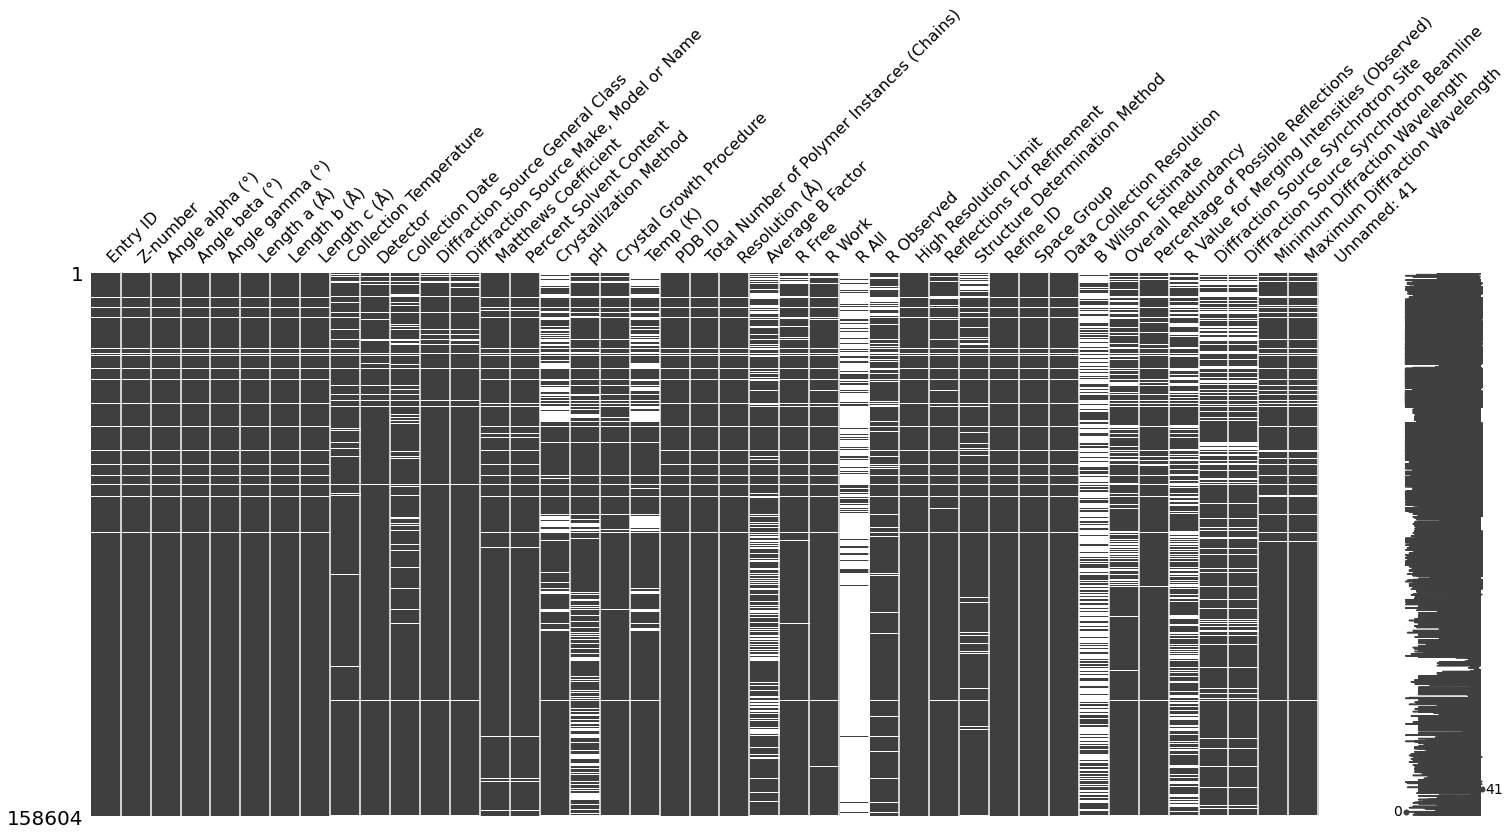

In [5]:
import missingno as msno
msno.matrix(df)
plt.show()


- If we consider all 42 features it will be a very complex model. Since the goal of the project is to find the relation between these features and the resolution value. It will be valid to use the only features which do not have a significant amount of missing values. Therefore dropping the columns with large missing values. 
- Also droppin the EntryID, PDB ID and Collection Date column.

In [6]:
df= df.drop(['Entry ID','R All', 'B Wilson Estimate', 'pH', 'Average B Factor','Overall Redundancy', 
             'Diffraction Source Synchrotron Site', 'R Value for Merging Intensities (Observed)',
            'Diffraction Source Synchrotron Beamline','Unnamed: 41','Space Group', 'Z-number',
             'Collection Date', 'Crystallization Method','Crystal Growth Procedure',
              'PDB ID', 'Percentage of Possible Reflections', 'Diffraction Source Make, Model or Name' ], axis=1)


In [7]:
df.shape

(158604, 24)

In [8]:
df.head().T

,0,1,2,3,4
Angle alpha (°),90.0,90.0,90.0,90.0,90.0
Angle beta (°),90.0,90.0,90.0,90.0,90.0
Angle gamma (°),120.0,120.0,120.0,120.0,120.0
Length a (Å),60.9,91.433,60.9,91.63,172.1
Length b (Å),60.9,91.433,60.9,91.63,172.1
Length c (Å),96.1,45.949,95.6,46.014,80.0
Collection Temperature,NaN,292.0,NaN,292.0,NaN
Detector,NaN,IMAGE PLATE,NaN,IMAGE PLATE,NaN
Diffraction Source General Class,NaN,ROTATING ANODE,NaN,ROTATING ANODE,NaN
Matthews Coefficient,2.75,3.09,2.7,3.09,3.04


In [9]:
# Replacing the space in column name by _ 

df.columns = df.columns.str.replace(' ','_')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158604 entries, 0 to 158603
Data columns (total 24 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Angle_alpha_(°)                             154232 non-null  float64
 1   Angle_beta_(°)                              154232 non-null  float64
 2   Angle_gamma_(°)                             154232 non-null  float64
 3   Length_a_(Å)                                154232 non-null  float64
 4   Length_b_(Å)                                154232 non-null  float64
 5   Length_c_(Å)                                154232 non-null  float64
 6   Collection_Temperature                      149610 non-null  float64
 7   Detector                                    150879 non-null  object 
 8   Diffraction_Source_General_Class            152962 non-null  object 
 9   Matthews_Coefficient                        153025 non-null  float64
 

## Handling missing values

Some of the features like Detector, Temp, R Observed have missing values arround 10000. Each observation in our dataset represents different the data of proteins. So replacing missing values with mean or median doesn't seem a apropriate solution in this case. So we will be only using observation for which all the values are available.  

In [11]:
df=df.dropna()
df.shape

(108064, 24)

## Checking the datatype of all the features

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108064 entries, 113 to 158518
Data columns (total 24 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Angle_alpha_(°)                             108064 non-null  float64
 1   Angle_beta_(°)                              108064 non-null  float64
 2   Angle_gamma_(°)                             108064 non-null  float64
 3   Length_a_(Å)                                108064 non-null  float64
 4   Length_b_(Å)                                108064 non-null  float64
 5   Length_c_(Å)                                108064 non-null  float64
 6   Collection_Temperature                      108064 non-null  float64
 7   Detector                                    108064 non-null  object 
 8   Diffraction_Source_General_Class            108064 non-null  object 
 9   Matthews_Coefficient                        108064 non-null  float64

In [13]:
df.describe(include='object').T

,count,unique,top,freq
Detector,108064,19,CCD,61202
Diffraction_Source_General_Class,108064,10,SYNCHROTRON,94079
Resolution_(Å),108064,3991,2,4846
Structure_Determination_Method,108064,513,MOLECULAR REPLACEMENT,85068
Refine_ID,108064,2,X-RAY DIFFRACTION,108056


- Refine_ID has only two unique values lets see the distribution of those values.

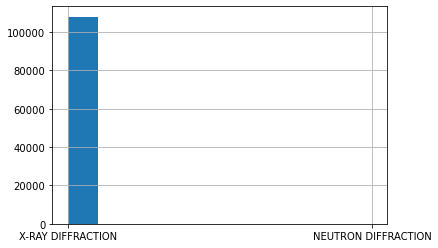

In [14]:
df['Refine_ID'].hist()
plt.show()

- Looks like there are only few values of Neutron Diffraction. So this column is not much informatory so dropping it.

In [15]:
df= df.drop(['Refine_ID'], axis=1)

- Resolution which is a target variable has numeric values but still it is in object data type. While converting the data type we observed that in the resolution column for some proteins there are two values. First one is by X-ray diffraction and the second one is from neutron diffraction. Since this study is focused on X-ray diffraction properties dropping the values of neutron diffraction.

In [16]:
df[df['Resolution_(Å)']=='1.752, 2.194']

,Angle_alpha_(°),Angle_beta_(°),Angle_gamma_(°),Length_a_(Å),Length_b_(Å),Length_c_(Å),Collection_Temperature,Detector,Diffraction_Source_General_Class,Matthews_Coefficient,...,Resolution_(Å),R_Free,R_Work,R_Observed,High_Resolution_Limit,Reflections_For_Refinement,Structure_Determination_Method,Data_Collection_Resolution,Minimum_Diffraction_Wavelength,Maximum_Diffraction_Wavelength


In [17]:
df['Resolution_(Å)'] = df['Resolution_(Å)'].str.split(',').str[0]
df['Resolution_(Å)'] = df['Resolution_(Å)'].astype(float, errors = 'raise')
df['Resolution_(Å)'].dtypes

dtype('float64')

## Conversion of Resolution
- If the protein in the crystals are aligned in a way that upon diffraction it will show the fine details of the crystal it becomes a perfect crystal for the study. In contrast if the proteins are not aligned properly due to  local flexibility or motion then we won't be able to see much of the details. REsolution is the measure of details observed in a diffraction pattern. So high-resolution structures, with resolution values of 1 Å are highly ordered and it is easy to see every atom in the pattern.

#### For this project we will be converting these resolution values into two groups as good(Yes) or bad(No) with 2 Å as threshold resolution. 

Reference : [Resolution](https://pdb101.rcsb.org/learn/guide-to-understanding-pdb-data/resolution)


In [18]:
# Creating list with new values

re_list=[]
for ind in df.index:
    if df['Resolution_(Å)'][ind] <= 2:
        re_list.append('Yes')
    else:
        re_list.append('No')

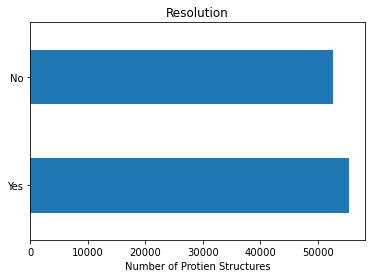

In [19]:
# Visualizing the class distribution in Resolution 

df['Resolution_(Å)']=re_list
df['Resolution_(Å)'].value_counts().plot.barh()
plt.title('Resolution')
plt.xlabel('Number of Protien Structures')
plt.show()

#### Observation
Target Resolution has equal number of both 'Yes' and 'No' values. There is no class imbalace for this target.

In [20]:
df['Total_Number_of_Polymer_Instances_(Chains)'].value_counts()[:5]

1.0     39164
2.0     36957
4.0     13952
3.0      6145
6.0      4534
8.0      2581
12.0     1165
5.0      1107
Name: Total_Number_of_Polymer_Instances_(Chains), dtype: int64

#### Observation
Total Number of Polymer Instances is a integer value which is stored as float. Converting it to the integer datatype.

In [21]:

df['Total_Number_of_Polymer_Instances_(Chains)']= df['Total_Number_of_Polymer_Instances_(Chains)'].astype(int, errors = 'raise')



## Converting the Length feature

Length_a_(Å),Length_b_(Å) and Length_c_(Å) represent the value of sides of the crystal cell. Instead of using these values individually it will be effective if we calculate the volume from these values. So that we can find the correlation between the size of the crystal and the resolution. 


In [22]:
temp_df = pd.DataFrame() 
temp_df["a*b"] = df["Length_a_(Å)"] * df["Length_b_(Å)"]
df["Crystal_cell_volum"]= temp_df['a*b' ]*df['Length_c_(Å)']
df= df.drop(['Length_a_(Å)', 'Length_b_(Å)','Length_c_(Å)'], axis=1)

In [23]:
df.shape

(108064, 21)

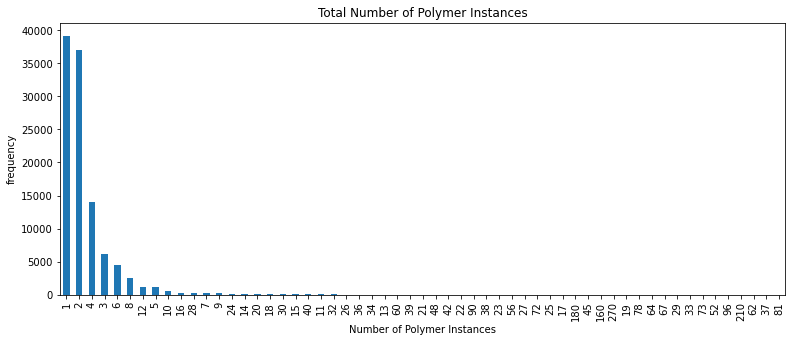

In [24]:
df['Total_Number_of_Polymer_Instances_(Chains)'].value_counts().plot(kind='bar', figsize=(13,5) )

plt.title('Total Number of Polymer Instances')
plt.xlabel('Number of Polymer Instances')
plt.ylabel('frequency')
plt.show()

#### Observation
Most polymer instances in the single crystal cell are 1 or 2. There are some structures with 3 to 12 polymer instances and rarely any structures with more than 12 total polymer instances.

### Creating the list of numerical and categorical columns

In [25]:
numerical_vars = df.select_dtypes(exclude= "object")
numerical_vars = numerical_vars.columns.tolist()
numerical_vars

['Angle_alpha_(°)',
 'Angle_beta_(°)',
 'Angle_gamma_(°)',
 'Collection_Temperature',
 'Matthews_Coefficient',
 'Percent_Solvent_Content',
 'Temp_(K)',
 'Total_Number_of_Polymer_Instances_(Chains)',
 'R_Free',
 'R_Work',
 'R_Observed',
 'High_Resolution_Limit',
 'Reflections_For_Refinement',
 'Data_Collection_Resolution',
 'Minimum_Diffraction_Wavelength',
 'Maximum_Diffraction_Wavelength',
 'Crystal_cell_volum']

In [26]:
categorical_vars = df.select_dtypes(include= "object")
categorical_vars= categorical_vars.columns.tolist()
categorical_vars

['Detector',
 'Diffraction_Source_General_Class',
 'Resolution_(Å)',
 'Structure_Determination_Method']

In [27]:
# Removing the resolution variable since it is a target variable.
categorical_vars.remove('Resolution_(Å)')
categorical_vars

['Detector',
 'Diffraction_Source_General_Class',
 'Structure_Determination_Method']

## Checking for Multicollinearity

We have 17 numerical variables there is very high risk of having a multicolinearity problem. To identify it we are using The Variance Inflation Factor (VIF). It represents how well the variable is explained by other independent variables.

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_variables = df[numerical_vars]
vif_data = pd.DataFrame()
vif_data["feature"] = X_variables.columns
vif_data["VIF"] = [variance_inflation_factor(X_variables.values, i) for i in range(len(X_variables.columns))]
vif_data

,feature,VIF
0,Angle_alpha_(°),764.066008
1,Angle_beta_(°),135.782582
2,Angle_gamma_(°),76.527439
3,Collection_Temperature,9.631765
4,Matthews_Coefficient,118.721456
5,Percent_Solvent_Content,198.630808
6,Temp_(K),701.450550
7,Total_Number_of_Polymer_Instances_(Chains),2.479874
8,R_Free,299.881433
9,R_Work,1341.420877


#### Observation
Result shows Angle_alpha_(°), Temp_(K), R_Work, R_Observed, High_Resolution_Limit, Data_Collection_Resolution have very high VIF score so removing those variables. Generally VIF values which have higher than 10 are also removed. In this particular data we are trying to find the relation I am keeping the values which are between 10 to 300 at this stage.

In [29]:
df= df.drop(['Angle_alpha_(°)', 'Temp_(K)','R_Work','R_Observed','High_Resolution_Limit',
             'Data_Collection_Resolution', ], axis=1)

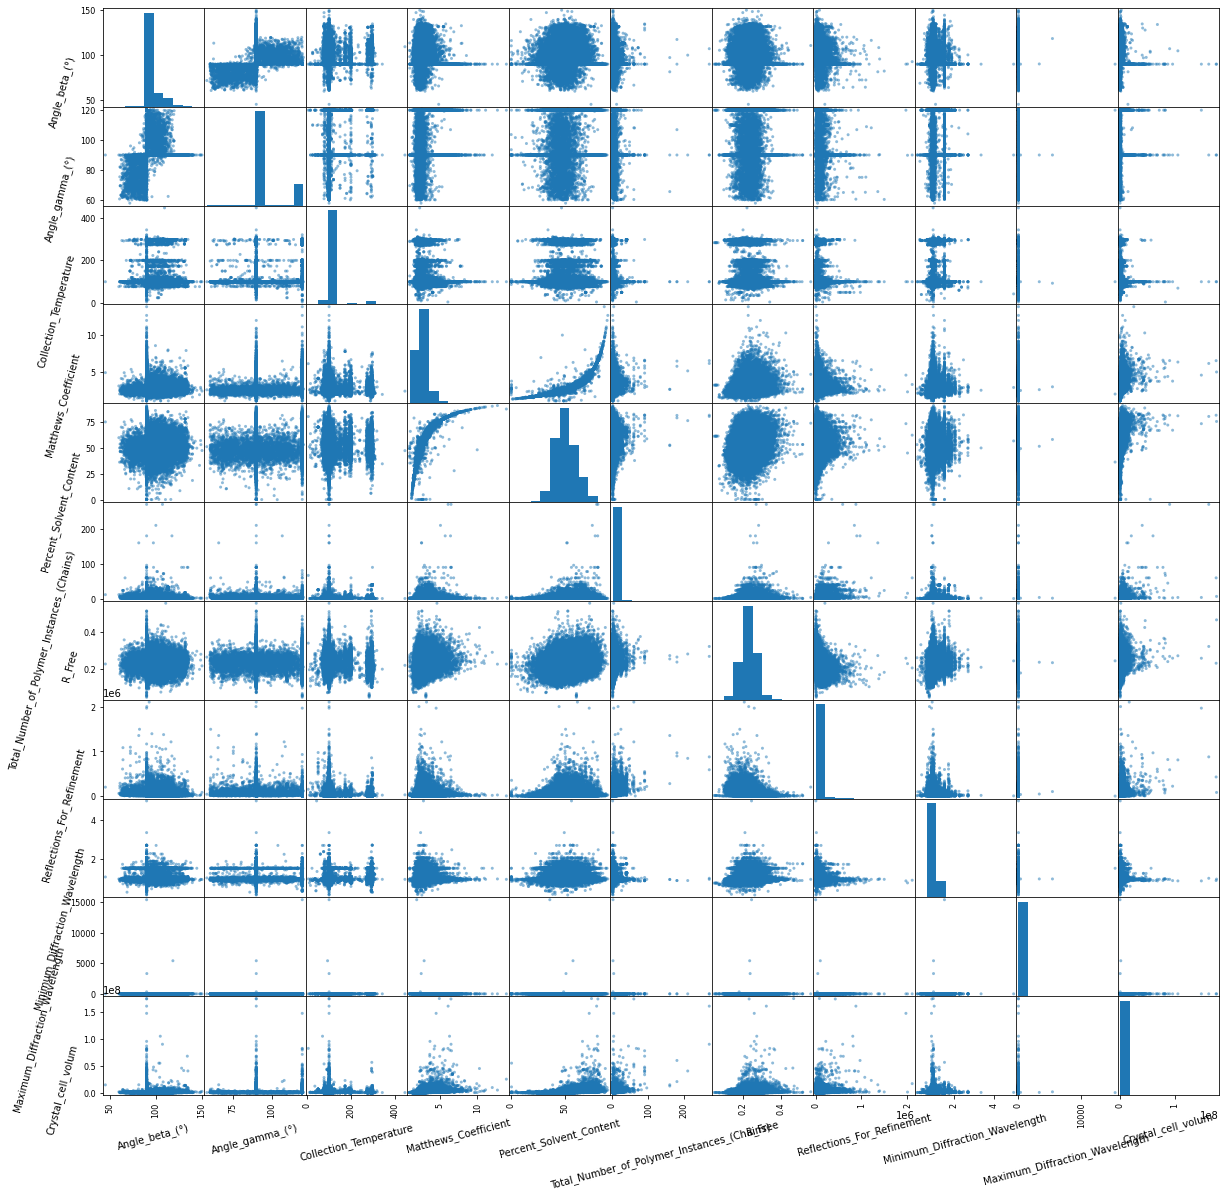

In [30]:
axes = pd.plotting.scatter_matrix(df, figsize=(20,20))
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(15)
    ax.yaxis.label.set_rotation(75)
    ax.yaxis.label.set_ha('right')


plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

#### Observation
From the above scatter matrix we dont see any relationships between columns excep for the. Matthews_Coefficient and Percent_Solvent_Content.

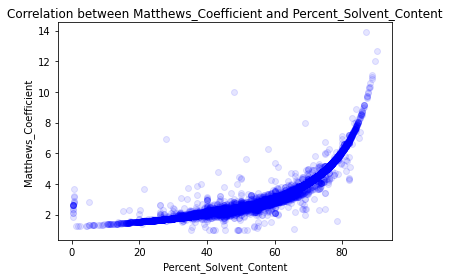

In [31]:
plt.plot( df['Percent_Solvent_Content'],df['Matthews_Coefficient'], 'bo', alpha=0.1)
plt.ylabel('Matthews_Coefficient')
plt.xlabel('Percent_Solvent_Content')
plt.title('Correlation between Matthews_Coefficient and Percent_Solvent_Content')
plt.show()


#### Observation
Matthews Coefficient represents the density of the crystal and Percent Solvent content represents the amount other contents than protein present in the crystal. Plot shows that as percent solvent increases there is not much of change in the density till 60%. After that density is increasing significantly.

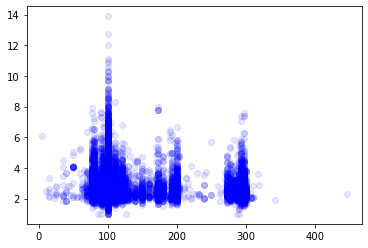

In [32]:
plt.plot( df['Collection_Temperature'],df['Matthews_Coefficient'], 'bo', alpha=0.1)
plt.show()

Don't see any correlation between the mean recorded temperature of the crystal and the density. 

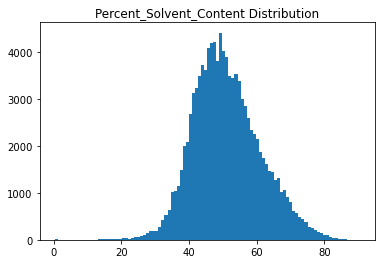

In [33]:
plt.hist(df['Percent_Solvent_Content'], bins=100)
plt.title('Percent_Solvent_Content Distribution')
plt.show()

Percent solvent content of the other solution in crystal cell value is normally distributed with mean at 50%

In [34]:
df['Diffraction_Source_General_Class'].value_counts()

SYNCHROTRON                  94079
ROTATING ANODE               12782
SEALED TUBE                    689
FREE ELECTRON LASER            442
LIQUID ANODE                    44
NUCLEAR REACTOR                 19
Rotating Copper Anode            5
ELECTRON MICROSCOPE              2
rotating-anode X-ray tube        1
SPALLATION SOURCE                1
Name: Diffraction_Source_General_Class, dtype: int64

Categorical values are in different cases converting them to uppercase.

In [35]:
df['Diffraction_Source_General_Class']=df['Diffraction_Source_General_Class'].str.upper()


In [36]:
 df['Detector'].value_counts()

CCD                          61202
PIXEL                        34560
IMAGE PLATE                  11429
CMOS                           393
AREA DETECTOR                  375
DIFFRACTOMETER                  76
FILM                             7
FLAT PANEL                       7
Q315R                            3
IMAGE PLATE AREA DETECTOR        2
PAD                              2
CDD                              1
ENRAF-NONIUS                     1
NOIR1                            1
PILATUS                          1
CCD detector                     1
PIXEL ARRAY DETECTOR             1
PILATUS 6M                       1
OSCILLATION CAMERA               1
Name: Detector, dtype: int64

In [37]:
df['Structure_Determination_Method'].value_counts()[:10]

MOLECULAR REPLACEMENT    85068
SAD                       8710
FOURIER SYNTHESIS         7250
MAD                       3967
MIR                        620
SIRAS                      449
AB INITIO PHASING          234
MIRAS                      159
MR                         132
OTHER                      121
Name: Structure_Determination_Method, dtype: int64

In [38]:
df.shape

(108064, 15)